# 1월 22일

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2

Using TensorFlow backend.


In [9]:
X_train = np.zeros((15*3, 24,24)) #print(X_train.shape)=(45, 24, 24)
y_train = np.zeros(15*3) #print(y_train.shape)=(45,)
#np.zeros:크기가 정해져 있고 모든 값이 0인 배열을 생성
#크기를 뜻하는 튜플을 입력하면 다차원 배열도 만들 수 있다.
#example) a= np.zeros((2, 3)) #print(a)=array([[0., 0., 0.],[0., 0., 0.]])

for i in range(15) :    
    img=cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1),0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img=cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1),0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img=cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1),0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     

In [10]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

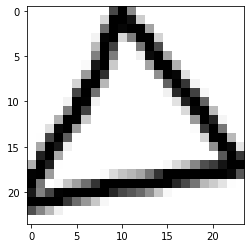

Label:  2.0


In [11]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [13]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape) #(45, 24, 24, 1)
print(X_test.shape) #(15, 24, 24, 1)
print(y_train.shape) #(45,3)
print(y_test.shape) #(15,3)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


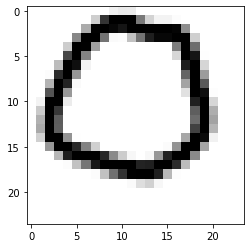

In [14]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [15]:
# 모델 구성하기
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1))) #32개의 필터를 찾아라
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(64, (3, 3))) #64개의 필터를 찾아라
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, 
                    validation_data =(X_test, y_test), verbose = 0)
#predict=최종 output까지 가라.(=forward 함수)
model.summary() #몇개의 데이터가 들어올지 모르기때문에 앞에는 항상 None
#Non-trainable params: 576

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_10 (Activation)   (None, 9, 9, 64)         

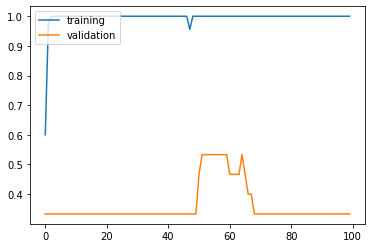

15/15 [==============================] - 0s 195us/step
[1.6255608797073364, 0.3333333432674408]


In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [31]:
for l in model.layers:
    print(l.name)
    print(l.trainable) #train이 가능한 layer인지 아닌지
    #false이면 해당 layer pass하고 지나감

conv2d_5
True
batch_normalization_9
True
activation_9
True
max_pooling2d_5
True
conv2d_6
True
batch_normalization_10
True
activation_10
True
max_pooling2d_6
True
flatten_3
True
dense_7
True
batch_normalization_11
True
activation_11
True
dense_8
True
batch_normalization_12
True
activation_12
True
dense_9
True


In [29]:
w=model.layers[0].get_weights() #첫번째 층의 weight를 가져옴

print(w[0].shape) #3x3으로 이루어진 
print(w[1].shape) #w[0]=필터/w[1]=bias

print(w[0][:,:,0,0]) #첫번째 필터
print(w[0][:,:,0,1]) #두번째 필터

(3, 3, 1, 32)
(32,)
[[-0.00098283 -0.00442826 -0.01484923]
 [ 0.08510448 -0.14472426  0.01027088]
 [-0.10153738  0.01303296 -0.07373676]]
[[-0.09174642 -0.02063018  0.06704681]
 [ 0.08379271  0.08952007  0.0795472 ]
 [ 0.1077363   0.10770409  0.04899563]]


In [32]:
model.layers[0].output #layer의 출력결과 ->22x22x32

<tf.Tensor 'conv2d_5/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>

(15, 22, 22, 32)


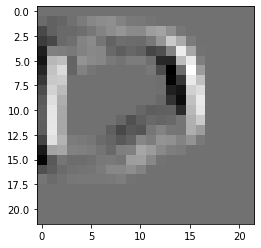

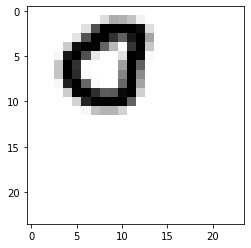

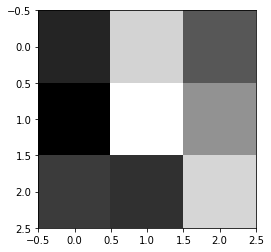

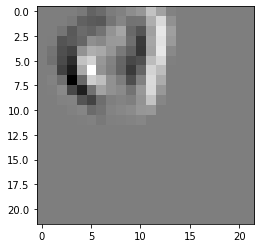

In [54]:
from keras.models import Model #중간결과를 알고싶으면 모델을 만들어야한다.
my_layer_model=Model(inputs=model.input, outputs=model.layers[0].output) #0번째 레이어의 아웃풋
output=my_layer_model.predict(X_test) #X_test=4차원 데이터 #predict는 예측함수가 아니다!!
print(output.shape) #(15, 22, 22, 32): 15개 이미지에 대해서 31개 필터
plt.imshow(output[0,:,:,5],cmap='gray') #0번째 테스트 이미지에 6번째 필터를 적용했을때 이미지
plt.show()

#1번째 이미지, 5번째 필터, 출력=1번째이미지*(5번째 필터+b)
plt.imshow(X_test[1,:,:,0],cmap='gray') #원본이미지
plt.show() #iImg=1로 설정하고 사용해도 됨

w=model.layers[0].get_weights() 
plt.imshow(w[0][:,:,0,5],cmap='gray') #filter
plt.show() #iFilter=5 변수로 두고 사용해도 됨

plt.imshow(output[1,:,:,5],cmap='gray') #1번 이미지+5번 필터
#plt.imshow(output[iImg,:,:,iFilter],cmap='gray')

In [75]:
#flatten된 결과를 어떻게 가져올까?
i_layer_model=Model(inputs=model.input, outputs=model.get_layer("flatten_3").output)
output=i_layer_model.predict(X_test) 
print(output.shape) #(15, 1024) 15개 샘플에 대해서 출력값 1024(=4*4*64)

#마지막 레이어의 결과
u_layer_model=Model(inputs=model.input, outputs=model.get_layer("dense_9").output)
output=u_layer_model.predict(X_test) 
print(output.shape) #(15, 1024) 15개 샘플에 대한 출력값 3개
# print(output)

P=np.argmax(output, axis=1) #argmax 사용해서 예측/ 최종 출력물
print(P) #예측값
T=np.argmax(y_test, axis=1) 
print(T) #True값
print('******************************')

print(P==T)
print(sum(P==T)*1) #맞춘 개수
print(sum(P==T)*1/len(P)) #확률

(15, 1024)
(15, 3)
[1 2 1 2 2 0 2 2 1 2 1 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
******************************
[False False False False False False False False  True False False  True
  True  True  True]
5
0.3333333333333333
